# Implementation of logistic regression:

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

UPLOAD TRAIN AND TEST DATASET

In [2]:
test_df = pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Logistic regression/emnist-letters-test.csv',header=None)
train_df = pd.read_csv('C:/Users/adity/OneDrive/Desktop/WOC4.0/Logistic regression/emnist-letters-train.csv',header=None)

In [3]:
test  = test_df.to_numpy()      # convert train and test data into numpy array.
train  = train_df.to_numpy()

In [5]:
X_train = train[:,1:]           # take features and actual output of train_data.
y_train = train[:,0]

In [4]:
X_test = test[:,1:]            # take features and actual output of test_data.
y_test = test[:,0]

In [6]:
print(y_train)                 # print actual output of train data.

[23  7 16 ...  1 23 12]


In [7]:
m,n = X_train.shape  # m,n is the no. of rows and columns of training features data respectively.

DATA NORMALIZATION

In [8]:
# features scaling of training and testing features data by its mean and standard deviation along zero axis.
X_test = (X_test-np.mean(X_test))/np.std(X_test)       
X_train = (X_train-np.mean(X_train))/np.std(X_train)

In [9]:
# Add a new ones column in training and testing features data.
u_test = np.ones((X_test.shape[0],1))              
u_train = np.ones((X_train.shape[0],1)) 

X_test = np.append(u_test,X_test, axis = 1)
X_train = np.append(u_train,X_train, axis = 1)

In [10]:
""" convert training and testing output data into (no. of items, 26) zeros numpy array and replace by one at the index = 
(letter_position(output)-1)."""
# create zeros numpy array.
Y_train = np.zeros((m,26))
Y_test = np.zeros((y_test.shape[0], 26))

# loop for replacing by 1.
for i in range(m):
    Y_train[i][y_train[i]-1] = 1

for i in range(y_test.shape[0], 26):
    Y_test[i][y_test[i]-1] = 1

COMPUTE COST FUNCTION

In [11]:
def compute_cost(X, Y, theta):
    
    m = X.shape[0]                            # m is the total no. of items.
    
    z = np.dot(X, theta)                      # z is matrix multiplycation of X and theta.
    y_pred = (1.0 / (1 + np.exp(-1*z)))       # y_pred by sigmoid function input as z.
    
    # this is the expression of cost function of logistics regression.
    cost = - ( (np.sum(Y*np.log(y_pred))) + np.sum((1-Y)*np.log(1-y_pred)) )/m
    
    return cost                               # return value is cost.

COMPUTE GRADIENT DESCENT

In [12]:
def gradient_descent(X, Y, learning_rate, iteration):
    
    m = len(X)                                             # m is the total no. of items.
    
    # create theta as a numpy array of dimension (X.shape[1], 26) and assign zero.
    theta = np.zeros((X.shape[1], 26))                
    
    # create cost_list as a list for storing cost value of each iteration.
    cost_list = []
    
    # loop for predicting y_pred(hypothesis function), update theta, cost on updated theta and store cost into cost_list.
    for i in range(iteration):
        
         z = np.dot(X, theta)
    
         y_pred = (1.0 / (1 + np.exp(-z)))
    
         d_theta = np.dot(X.T, y_pred - Y)/m
    
         theta = theta - learning_rate*d_theta
        
         cost = compute_cost(X, Y, theta)
         
         cost_list.append(cost)
        
        
    return theta, cost_list                  # return value is theta and cost_list.

In [13]:
iteration = 1000                    # no.of iterations.

# Call the gradient_descent function for training data by input as X_train(features), Y_train(actual output), alpha, iteration.
theta, cost_list = gradient_descent(X_train, Y_train, 0.05, 1000)

CURVE COST VS ITERATION

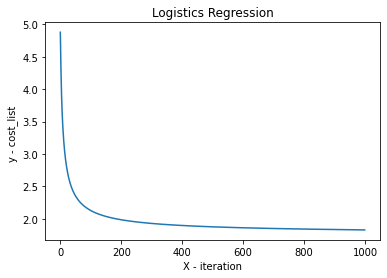

In [14]:
rng = np.arange(iteration)
plt.plot(rng, cost_list)
plt.xlabel('X - iteration')
plt.ylabel('y - cost_list ')
plt.title('Logistics Regression')
plt.show()

In [15]:
# Cost value for last 10 iterations.
print(cost_list[-10:])

[1.8315063719625002, 1.8314507594016123, 1.8313952359998154, 1.8313398015152278, 1.831284455706879, 1.8312291983347009, 1.8311740291595247, 1.831118947943073, 1.8310639544479608, 1.831009048437689]


In [16]:
# compute cost value for testing data on predicted theta and print.
cost = compute_cost(X_test, Y_test, theta)
cost

1.6368492551527296

In [17]:
z = np.dot(X_test, theta)
    
y_pred = (1.0 / (1 + np.exp(-z)))

hypothesis = np.zeros((y_test.size, 1))
index = 0
for i in np.argmax(y_pred,1):
    hypothesis[index] = i+1
    index+=1

print(hypothesis)
print(y_test)

[[ 5.]
 [24.]
 [ 1.]
 ...
 [19.]
 [10.]
 [ 1.]]
[ 1  1  1 ... 19 19 19]


In [18]:
# Accuracy calculation by how many predictions match with actual output to the total items.
def accuracy(y, Y):
    count = 0
# loop for counting.
    for i in range(y.size):
        if(y[i]==Y[i]):
            count+=1
            
    percent_acc = (count*100)/(y.size)
    return percent_acc    

In [19]:
accuracy(y_test, hypothesis)    # check accuracy on testing data.

68.79729729729729